In [1]:
import numpy as np
from icecream import ic
from src.utils import *

from src.tree_node import Node
from src.genetic_algorithm import Genetic_Algorithm
from src.individual import Individual


# Funny Playgroud

In [2]:
for i in range(9):
    problem = np.load(f'data/problem_{i}.npz')
    x = problem['x']
    y = problem['y']
    print(f"Problem type {i}: ",x.shape, y.shape)

Problem type 0:  (2, 1000) (1000,)
Problem type 1:  (1, 500) (500,)
Problem type 2:  (3, 5000) (5000,)
Problem type 3:  (3, 5000) (5000,)
Problem type 4:  (2, 5000) (5000,)
Problem type 5:  (2, 5000) (5000,)
Problem type 6:  (2, 5000) (5000,)
Problem type 7:  (2, 5000) (5000,)
Problem type 8:  (6, 50000) (50000,)


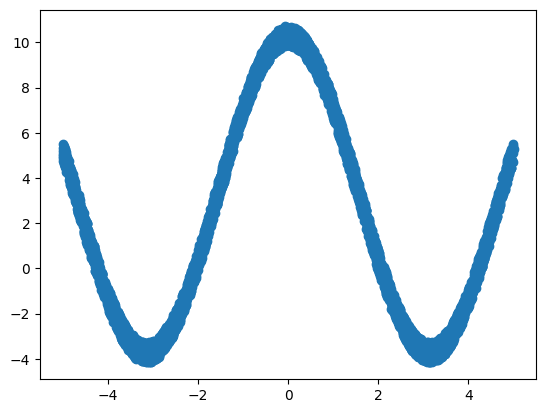

In [28]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x[1], y)
plt.show()

# Data Preparation

In [73]:
###   DATA LOADER   ###
PROBLEM_NUM = 8

x, y = data_loader(PROBLEM_NUM)

Problem type 8:  (6, 50000) (50000,)
Number of variables:  6


In [74]:
###   DATA SPLIT   ###
(x_train, y_train) , (x_test, y_test) = data_split(x, y)

Train dataset:  (6, 35000) (35000,)
Test dataset:  (6, 15000) (15000,)


# Genetic Algorithm

In [93]:
###   Initialize Genetic Algorithm   ###
GA = Genetic_Algorithm(pop_size=150, off_num=20, num_gen=30, num_eras=30, num_var=x_train.shape[0], num_isl=1)       ##  


In [94]:
history = GA.start(x_train, y_train)

era:  0
[150]
isl:  0
gen:  0
gen:  1
gen:  2
gen:  3
gen:  4
gen:  5
gen:  6
gen:  7
gen:  8
gen:  9
gen:  10
gen:  11
gen:  12
gen:  13
gen:  14
gen:  15
gen:  16
gen:  17
gen:  18
gen:  19
gen:  20
gen:  21
gen:  22
gen:  23
gen:  24
gen:  25
gen:  26
gen:  27
gen:  28
gen:  29
era:  1
[150]
isl:  0
gen:  0
gen:  1
gen:  2
gen:  3
gen:  4
gen:  5
gen:  6
gen:  7
gen:  8
gen:  9
gen:  10
gen:  11
gen:  12
gen:  13
gen:  14
gen:  15
gen:  16
gen:  17
gen:  18
gen:  19
gen:  20
gen:  21
gen:  22
gen:  23
gen:  24
gen:  25
gen:  26
gen:  27
gen:  28
gen:  29
era:  2
[150]
isl:  0
gen:  0
gen:  1
gen:  2
gen:  3
gen:  4
gen:  5
gen:  6
gen:  7
gen:  8
gen:  9
gen:  10
gen:  11
gen:  12
gen:  13
gen:  14
gen:  15
gen:  16
gen:  17
gen:  18
gen:  19
gen:  20
gen:  21
gen:  22
gen:  23
gen:  24
gen:  25
gen:  26
gen:  27
gen:  28
gen:  29
era:  3
[150]
isl:  0
gen:  0
gen:  1
gen:  2
gen:  3
gen:  4
gen:  5
gen:  6
gen:  7
gen:  8
gen:  9
gen:  10
gen:  11
gen:  12
gen:  13
gen:  14
gen:  1

In [95]:
for key, pop in history.items():
    print(f"{key.upper()} island better individual over generations:")
    for ind in pop:
        ind.show_function()

UNIQUE island better individual over generations:
(arccosh ((exp2 (exp2 x1)) divide 0.5658998405729352))
(arccosh ((exp2 (exp2 x3)) divide 0.5658998405729352))
(arccosh ((exp2 (exp2 x4)) divide 0.5658998405729352))
(arccosh ((exp2 (exp2 x4)) divide -1.2203699620856767))
((exp2 x0) add (exp2 x0))
((exp2 x3) add (exp2 x3))
((absolute x4) add (absolute x4))
((absolute x3) add (absolute x3))
((absolute x3) add (absolute x3))
((absolute x1) add (absolute x1))
((absolute x1) add (absolute x1))
((absolute x1) add (absolute x1))
((absolute x4) add (absolute x4))
((absolute x4) add (absolute x4))
(((exp2 x5) floor_divide (exp2 (arcsinh x0))) add ((exp2 x5) floor_divide (exp2 (arcsinh x0))))
(((exp2 x4) floor_divide (exp2 (arcsinh x0))) add ((exp2 x5) floor_divide (exp2 (arcsinh x0))))
(((exp2 x4) floor_divide (exp2 (arcsinh x0))) add ((exp2 x5) floor_divide (exp2 (arcsinh x0))))
(((exp2 x5) add (exp2 x5)) add ((exp2 x5) add (exp2 x5)))
(exp (x1 add x5))
(exp ((x5 floor_divide 1.2612707430595158

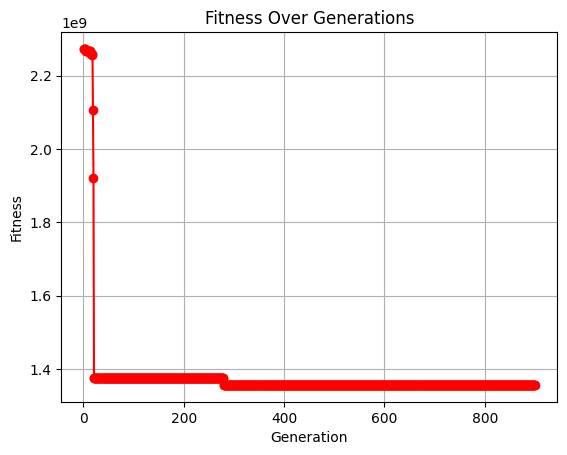

In [96]:
GA.plot_fitness_history(history["unique"])
GA.get_best_ind()

## Evaluation


In [97]:
test_MSE = test(history["unique"][-1], x_test, y_test)

MSE (real) : 9.15933e+24


# Test

In [5]:
### FUNCTION TO TEST    ###
FUNCTION_TO_TEST = 8

function = function_cod(num=8)
print(function)

[<function f0 at 0x000002C6ACE32FC0>, <function f1 at 0x000002C6ACE30AE0>, <function f2 at 0x000002C6ACE33060>, <function f3 at 0x000002C6ACE33100>, <function f4 at 0x000002C6ACE331A0>, <function f5 at 0x000002C6ACE33240>, <function f6 at 0x000002C6ACE332E0>, <function f7 at 0x000002C6ACE33380>, <function f8 at 0x000002C6ACE33420>]


In [6]:
problem = np.load(f'data/problem_{FUNCTION_TO_TEST}.npz')
x = problem['x']
y = problem['y']
x.shape, y.shape


((6, 50000), (50000,))

In [7]:
for i in range(9):
    print("\t", i)
    problem = np.load(f'data/problem_{i}.npz')
    x = problem['x']
    y = problem['y']
    x.shape, y.shape
    print(f"MSE: {100*np.square(y-function[FUNCTION_TO_TEST](x)).sum()/len(y):g}")

	 0
MSE: 6.4587e+15
	 1
MSE: 182994
	 2
MSE: 1.1985e+25
	 3
MSE: 8.85761e+24
	 4
MSE: 8.59786e+24
	 5
MSE: 1.97544e+25
	 6
MSE: 1.57778e+25
	 7
MSE: 1.29039e+10
	 8
MSE: 1.05633e+25


In [8]:
    print(f"MSE: {100*np.square(y-function[FUNCTION_TO_TEST](x)).sum()/len(y):g}")

MSE: 1.05633e+25
